# Column Transformation

To obtain a prediction with a better performance, it is needed to evaluate if feature in the model. To this aim, each of them will be explored to see if they have a normal distribution since they will be more meaningful to the model in this way.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

In [2]:
root = '../data/cars_reg.csv'

df = pd.read_csv(root)

df.head()

,doors,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,price,...,Offroad,Pickup,Roadster,Sedan,Stationwagon,Targa,Van,brand_encoded,model_encoded,city_encoded
0,2,99,157,270,145,4.3,780,33,13.7,5500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11039.980916,10171.125628,15841.032810
1,3,179,140,426,235,7.6,1373,55,7.2,10900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17051.258362,13160.993789,18049.881613
2,4,109,142,453,222,4.2,1545,42,8.5,36100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23572.093803,23508.383973,18554.493671
3,5,142,162,467,212,5.4,1740,67,8.0,28000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23572.093803,36412.589552,16569.441935
4,2,488,123,446,189,21.0,1546,70,3.9,27990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12506.369048,17773.464491,17306.168324


## Represent curves distribution

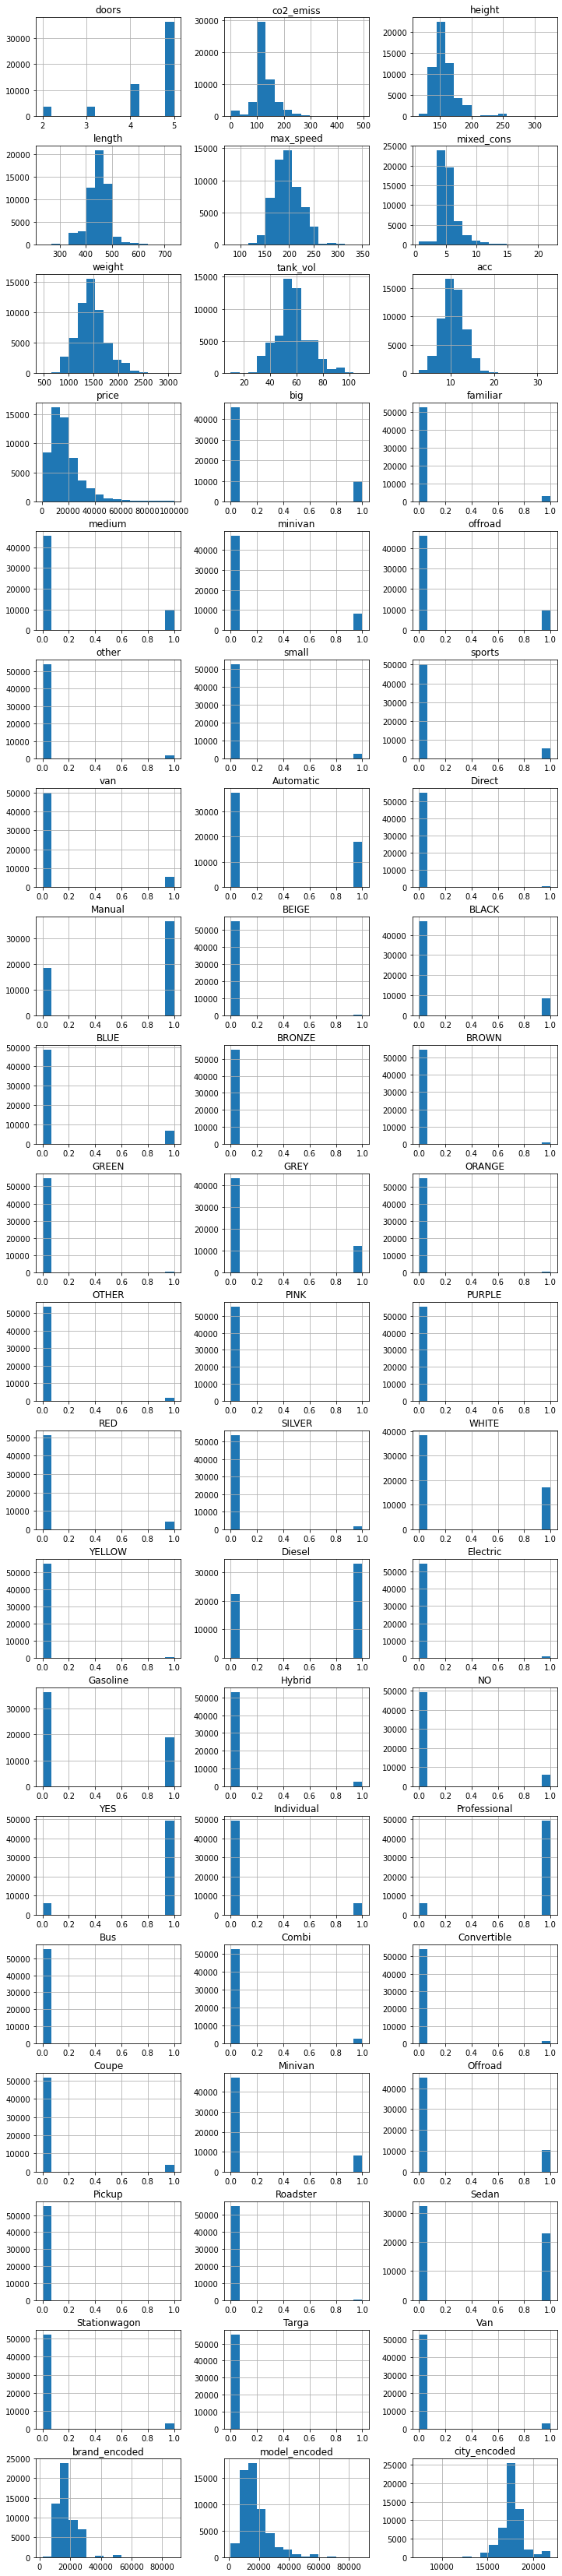

In [10]:
fig, axes = plt.subplots(len(df.columns)//3, 3, figsize=(12, 60))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column=df.columns[i], bins=15, ax=axis)
        i += 1

## Power Transformations: Box-Cox and Yeo-Johnson

## Standardizing columns: StandardScaler, MinMaxScaler

## Applying a binarizer

## PCA: Reduce Dimensionality